In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/700-classic-disco-tracks-with-spotify-data/ClassicDisco.csv



* In this project we are going to make clusters of the Spotify Tracks based on the Tempo they have and track's popularity.
* The purpose of this project is to see if there is a clear groups based on these two parameters(Tempo and popularity).

# Importing the Data

Here we are importing the data from a csv file using read _csv method and loading into a pandas dataframe named as spotify_tracks

In [3]:
spotify_tracks=pd.read_csv('/kaggle/input/700-classic-disco-tracks-with-spotify-data/ClassicDisco.csv')
spotify_tracks

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Boogie Oogie Oogie,A Taste Of Honey,A Taste Of Honey,1978,245173,4,0.797,0.548,2,-9.228,0,0.0492,0.040100,0.000010,0.0994,0.868,123.686,53
1,Disco Dancin' - 2004 - Remastered,A Taste Of Honey,A Taste Of Honey,1978,210493,4,0.751,0.570,2,-11.645,1,0.0813,0.371000,0.000020,0.1230,0.770,103.408,11
2,Distant,A Taste Of Honey,A Taste Of Honey,1978,260053,4,0.468,0.512,2,-10.187,1,0.1380,0.782000,0.000020,0.2020,0.714,163.400,13
3,Do It Good,A Taste Of Honey,Another Taste (Expanded Edition),1978,342826,4,0.699,0.740,3,-8.625,0,0.0289,0.071400,0.000002,0.1650,0.889,104.168,17
4,If We Loved,A Taste Of Honey,A Taste Of Honey,1978,266200,4,0.463,0.459,6,-11.600,1,0.0296,0.764000,0.000003,0.1580,0.300,129.267,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,Lady America,Voyage,"Twelve Inch Classics from the 70s, Vol. 2",1979,407800,4,0.649,0.840,5,-7.713,1,0.0411,0.000681,0.006580,0.3750,0.921,128.020,23
720,Let's Fly Away,Voyage,Fly Away,1979,306818,4,0.709,0.854,8,-4.750,1,0.0348,0.050600,0.000055,0.6240,0.900,129.258,15
721,Scotch Machine,Voyage,Voyage,1979,208200,4,0.633,0.901,10,-10.248,1,0.0325,0.000343,0.909000,0.0533,0.862,129.173,20
722,Souvenirs,Voyage,Fly Away,1979,390567,4,0.633,0.970,5,-4.153,1,0.0380,0.000667,0.202000,0.3960,0.757,127.776,29


Here we analyse the data by using describe method. This gives us an overview of the data which helps us in further analysis.

In [4]:
spotify_tracks.describe()

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,724.000000,7.240000e+02,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1977.872928,3.013971e+05,3.970994,0.691912,0.665481,5.356354,-10.043793,0.574586,0.060252,0.193440,0.094249,0.173522,0.762259,118.746369,32.486188
std,4.126678,1.000937e+05,0.175981,0.127139,0.176193,3.741299,3.130664,0.494747,0.038666,0.217953,0.216858,0.163982,0.192723,18.784116,19.201734
min,1967.000000,1.270530e+05,3.000000,0.293000,0.034800,0.000000,-23.920000,0.000000,0.023200,0.000017,0.000000,0.017300,0.085500,63.103000,0.000000
25%,1976.000000,2.306595e+05,4.000000,0.618750,0.549750,2.000000,-12.124500,0.000000,0.036500,0.028400,0.000012,0.070600,0.671000,108.563000,17.000000
50%,1978.000000,2.808165e+05,4.000000,0.708000,0.689000,5.000000,-9.701000,1.000000,0.049300,0.111000,0.000747,0.106000,0.821500,118.718000,30.500000
75%,1980.000000,3.534562e+05,4.000000,0.784000,0.805750,9.000000,-7.635750,1.000000,0.069600,0.278250,0.032700,0.224250,0.909000,126.461250,47.000000
max,2020.000000,1.008533e+06,5.000000,0.980000,0.985000,11.000000,-3.384000,1.000000,0.386000,0.962000,0.941000,0.984000,0.984000,203.669000,85.000000



* Here we are looking for any null values that can be present in any of the columns.
* We use isnull and sum function to see if there are any null values. 

In [5]:
spotify_tracks.isnull().sum()

Track               0
Artist              0
Album               0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
dtype: int64

# Clustering

* Here we using K means algorithm to make clusters of the songs using the 'Tempo' and 'Popularity' column.
* First we put values from these two columns into X.

In [8]:
X = spotify_tracks.iloc[:,[16,17]].values
X

array([[123.686,  53.   ],
       [103.408,  11.   ],
       [163.4  ,  13.   ],
       ...,
       [129.173,  20.   ],
       [127.776,  29.   ],
       [127.591,  24.   ]])

* Now we fit X using K means algorithm we take values of k (number of centroids) starting from 1 to 11
* We then calculate WCSS(within cluster sum of square) for each value of k
* Then store these values of WCSS into an array                         

In [11]:
WCSS = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

* Now we make a plot of WCSS vs. k to find the optimal value of k i.e. number of clusters that should be there in the given dataset.
* This plot is also known as elbow curve.


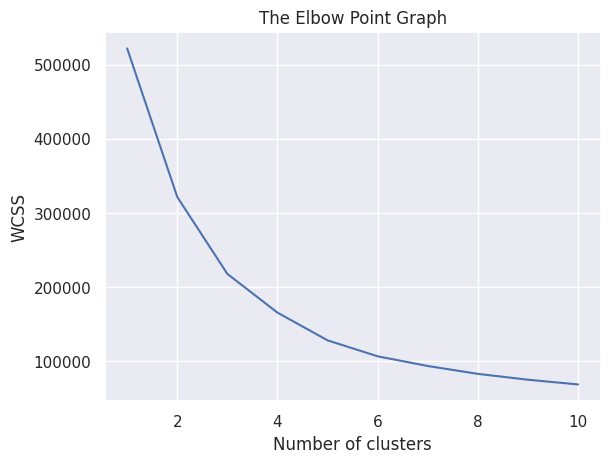

In [20]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


* Now using the above plot we know that the optimal value of k is 6 so we train the dataset using this value.
* We distribute the data into clusters using this value only

In [21]:
kmeans= KMeans(n_clusters=6, init='k-means++',random_state=0)
Y = kmeans.fit_predict(X)
print(Y)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 5 0 2 4 0 0 0 1 3 3 3 3 3 3 3 1 3 2 0 5 2 2 1 2 0 2 0 5 4 4 3 4 3 0 2
 4 4 0 0 1 0 4 2 1 2 0 2 2 2 0 4 0 4 3 1 1 1 1 3 4 0 3 3 1 3 3 1 3 3 3 2 4
 4 3 0 4 1 4 2 4 0 0 2 4 2 5 1 3 3 0 3 3 3 4 1 3 2 2 2 2 4 2 2 2 4 2 2 4 3
 4 2 4 2 2 3 3 0 2 0 3 4 0 4 4 0 4 4 4 4 4 4 3 0 2 4 2 2 1 2 2 3 3 3 3 3 1
 3 4 3 4 2 2 2 2 2 2 0 2 2 4 5 0 0 0 4 3 4 3 3 2 4 4 0 0 4 3 2 3 4 3 1 0 4
 2 0 5 0 4 2 3 1 3 3 3 2 0 3 4 4 3 3 3 1 3 3 4 3 4 1 3 3 3 3 4 3 4 2 0 4 4
 0 1 0 4 1 0 0 2 4 1 4 0 0 3 3 4 4 4 3 4 3 0 4 2 4 4 4 1 0 2 4 4 4 4 1 4 2
 4 4 4 0 3 2 4 4 5 5 2 2 2 2 2 4 4 4 5 4 4 2 4 5 0 0 4 3 1 4 0 4 3 1 4 4 3
 1 4 1 1 3 0 0 0 1 0 4 3 0 5 2 0 0 5 2 3 2 4 1 2 2 4 1 3 2 0 0 4 4 1 1 3 4
 5 1 0 4 0 1 4 2 2 2 2 2 2 3 2 3 0 0 4 2 4 0 3 2 0 4 0 2 4 3 3 4 2 2 2 0 4
 0 4 2 0 4 2 2 2 2 0 2 0 4 0 0 4 4 0 4 2 0 2 2 2 0 0 2 0 0 4 3 5 3 3 3 1 3
 3 3 3 3 2 4 3 2 1 3 1 4 4 3 0 4 1 4 3 2 2 4 0 5 2 2 4 0 4 2 0 1 4 3 3 4 1
 3 2 4 3 0 3 1 2 1 1 2 1 0 3 5 1 4 1 3 1 1 3 4 2 0 5 0 4 2 3 0 4 4 2 2 2 4
 4 0 2 1 1 1 0 0 0 2 4 1 

We now plot the graph of Tempo vs. Popularity showing all data points distributed into differnet clusters denoted by different colours.

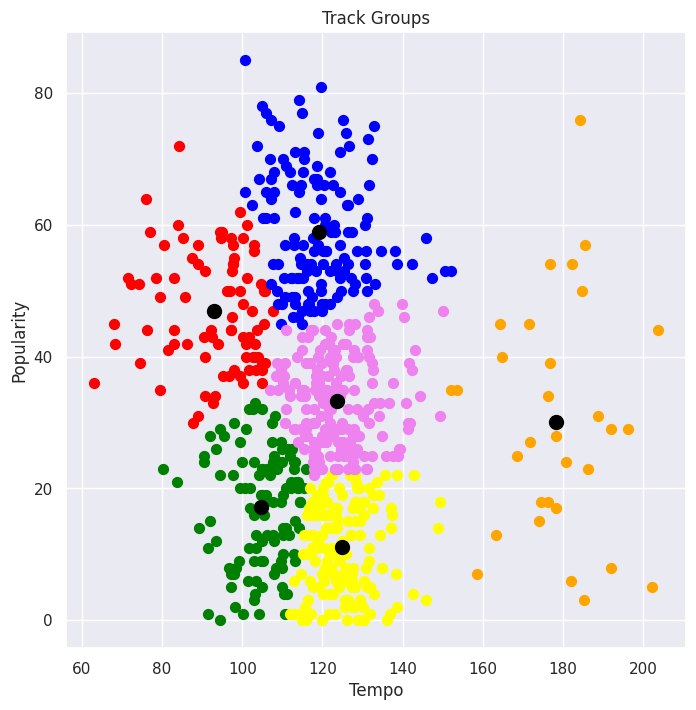

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1],s=50,c='violet',label='Cluster 5')
plt.scatter(X[Y==5,0], X[Y==5,1],s=50,c='orange',label='Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label='centroids')

plt.title('Track Groups')
plt.xlabel('Tempo')
plt.ylabel('Popularity')
plt.show()